# pip installs

In [ ]:
pip install colabcode

In [ ]:
pip install fastapi

     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 59 kB 8.1 MB/s 
     |████████████████████████████████| 10.9 MB 74.2 MB/s 


In [ ]:
pip install pypdf2

     |████████████████████████████████| 80 kB 6.7 MB/s 


In [ ]:
pip install PyMuPDF

     |████████████████████████████████| 8.8 MB 12.5 MB/s 


In [ ]:
pip install pillow

# directory reads

In [ ]:
import glob
pdfs = glob.glob("/content/barakhadi_files" + '/*.pdf')
print(pdfs)
for filename in pdfs:
  print(filename[9:])

['/content/barakhadi_files/ushi_barakhadi.pdf', '/content/barakhadi_files/barakhadi_3.pdf', '/content/barakhadi_files/mavshi_barakhadi.pdf', '/content/barakhadi_files/barakhadi_tushar.pdf', '/content/barakhadi_files/dad_barakhadi1.pdf']
barakhadi_files/ushi_barakhadi.pdf
barakhadi_files/barakhadi_3.pdf
barakhadi_files/mavshi_barakhadi.pdf
barakhadi_files/barakhadi_tushar.pdf
barakhadi_files/dad_barakhadi1.pdf


In [ ]:
import PyPDF2 as pdf
myPDF = [None] * len(pdfs)
myPDFReader = [None] * len(pdfs)
i=0
for filename in pdfs:
  myPDF[i] = open(filename[9:],'rb')
  myPDFReader[i] = pdf.PdfFileReader(myPDF[i])
  print(myPDFReader[i].numPages)
  i=i+1

2
2
2
2
2


In [ ]:
# Delete directories in Python using shutil
import shutil
path = '/content/barakhadi'
shutil.rmtree(path, ignore_errors=True)

# basic character classification

In [ ]:
import os
os.mkdir('/content/barakhadi')
characters = ['ka','kha','ga','gha','ang','cha','chha','ja','za','nya','Ta','Tha','Da','Dha','ana','ta','tha','da','dha','na']
page = myPDFReader.getPage(0)
print(page.mediaBox.getUpperRight_x(), page.mediaBox.getUpperRight_y())
#page.trimBox.lowerLeft = (25, 25)
#page.trimBox.upperRight = (225, 225)
for i in range(19):
  os.mkdir("/content/barakhadi/" + characters[18-i])
  for j in range(12):
    output = pdf.PdfFileWriter()
    page.cropBox.lowerLeft = (50 + 41.5*j, 96 + 33.8*i)
    page.cropBox.upperRight = (91.5 + 41.5*j, 128.8 + 33.8*i)
    output.addPage(page)
    with open("/content/barakhadi/" + characters[18-i] +"/out_" + characters[18-i] + "_" + str(j+1) + ".pdf", "wb") as out_f:
      output.write(out_f)

AttributeError: ignored

# Specific folder classification

In [ ]:
import os
import fitz
os.mkdir('/content/barakhadi')
pages = [None] * len(pdfs)
output = [None] * len(pdfs)
vyanjan = [['ka','kha','ga','gha','ang','cha','chha','ja','za','nya','Tta','Ttha','Dda','Ddha','ana','ta','tha','da','dha'],['na','pa','pha','ba','bha','ma','ya','ra','la','va','sha','ssha','sa','ha','ksha','tra','dnya','blank','x']]
swara = ['a','aa','e','ee','u','uu','ae','ai','ao','au','am','aha']
for p in range(2):
  for k in range(len(pdfs)):
    pages[k] = myPDFReader[k].getPage(p)
    print(pages[k].mediaBox.getUpperRight_x(), pages[k].mediaBox.getUpperRight_y())
  #page.trimBox.lowerLeft = (25, 25)
  #page.trimBox.upperRight = (225, 225)
  for i in range(19):
    os.mkdir("/content/barakhadi/" + vyanjan[p][18-i])
    for j in range(12):
      for l in range(len(pdfs)):
        output[l] = pdf.PdfFileWriter()
        pages[l].cropBox.lowerLeft = (0 + 49*j, 0 + 42*i)
        pages[l].cropBox.upperRight = (49 + 49*j, 42 + 42*i)
        output[l].addPage(pages[l])
        with open("/content/barakhadi/" + vyanjan[p][18-i] +"/out_" + vyanjan[p][18-i] + "_" + swara[j] + "_" + str(l+1) + ".pdf", "wb") as out_f:
          output[l].write(out_f)

591.5 792.0
592.6 792.0
596.5 792.0
589.2 792.0
580.8 792.0
582.8 792.0
588.6 792.0
612.0 790.5
594.0 792.0
584.5 792.0


# pdf to jpg conversion

In [ ]:
# Delete directories in Python using shutil
import shutil
path = '/content/barakhadi_jpg'
shutil.rmtree(path, ignore_errors=True)

In [ ]:
os.mkdir('/content/barakhadi_jpg')

In [ ]:
vyanjan_jpg = ['ka','kha','ga','gha','ang','cha','chha','ja','za','nya','Tta','Ttha','Dda','Ddha','ana','ta','tha','da','dha','na','pa','pha','ba','bha','ma','ya','ra','la','va','sha','ssha','sa','ha','ksha','tra','dnya','blank','x']
swara_jpg = ['a','aa','e','ee','u','uu','ae','ai','ao','au','am','aha']
import fitz 
for i in range(38):
  os.mkdir("/content/barakhadi_jpg/" + vyanjan_jpg[37-i])
  for j in range(12):
      for l in range(len(pdfs)):
          pdffile = "/content/barakhadi/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(l+1) + ".pdf"
          doc = fitz.open(pdffile)
          page = doc.loadPage(0)
          pix = page.get_pixmap()
          output = "/content/barakhadi_jpg/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(l+1) + ".jpg"
          pix.save(output)


Deprecation: 'loadPage' removed from class 'Document' after v1.19 - use 'load_page'.


In [ ]:
#creating zip file of the OUTPUT
import shutil
shutil.make_archive('/content/barakhadi', 'zip', '/content/barakhadi')

# Feature Extraction

In [ ]:
# Delete directories in Python using shutil
import shutil
path = '/content/barakhadi_lbp'
shutil.rmtree(path, ignore_errors=True)

In [ ]:
os.mkdir('/content/barakhadi_hog')

In [ ]:
import cv2
import os
import glob
import numpy as np
from skimage import data, color, feature
import skimage.data

#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
img_dir = "images" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []

vyanjan_jpg = ['ka','kha','ga','gha','ang','cha','chha','ja','za','nya','Tta','Ttha','Dda','Ddha','ana','ta','tha','da','dha','na','pa','pha','ba','bha','ma','ya','ra','la','va','sha','ssha','sa','ha','ksha','tra','dnya','blank','x']
swara_jpg = ['a','aa','e','ee','u','uu','ae','ai','ao','au','am','aha']
import fitz 
for i in range(38):
  os.mkdir("/content/barakhadi_hog/" + vyanjan_jpg[37-i])
  for j in range(12):
      for k in range(len(pdfs)):
          input = "/content/barakhadi_jpg/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(k+1) + ".jpg"
          img = cv2.imread(input)
          resized_img = resize(img, (128, 128))
          fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, multichannel=True)
          plt.imsave("/content/barakhadi_hog/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(k+1) + ".jpg", hog_image, cmap="gray")

# LBP

In [ ]:
# Delete directories in Python using shutil
import shutil
path = '/content/barakhadi_lbp'
shutil.rmtree(path, ignore_errors=True)

In [ ]:
import cv2 
from matplotlib import pyplot as plt

In [ ]:
def lbp(photo):
  import cv2 
  import numpy as np 
  def assign_bit(picture, x, y, c):   #comparing bit with threshold value of centre pixel
      bit = 0  
      try:          
          if picture[x][y] >= c: 
              bit = 1         
      except: 
          pass
      return bit 
  def local_bin_val(picture, x, y):  #calculating local binary pattern value of a pixel
      eight_bit_binary = []
      centre = picture[x][y] 
      powers = [1, 2, 4, 8, 16, 32, 64, 128] 
      decimal_val = 0
      #starting from top right,assigning bit to pixels clockwise 
      eight_bit_binary.append(assign_bit(picture, x-1, y + 1,centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y, centre))     
      #calculating decimal value of the 8-bit binary number
      for i in range(len(eight_bit_binary)): 
          decimal_val += eight_bit_binary[i] * powers[i] 
            
      return decimal_val 
  m, n, _ = photo.shape 
  gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  lbp_photo = np.zeros((m, n),np.uint8) 
  # converting image to lbp
  for i in range(0,m): 
      for j in range(0,n): 
          lbp_photo[i, j] = local_bin_val(gray_scale, i, j) 
 
  return lbp_photo

In [ ]:
os.mkdir('/content/barakhadi_lbp')

In [ ]:
vyanjan_jpg = ['ka','kha','ga','gha','ang','cha','chha','ja','za','nya','Tta','Ttha','Dda','Ddha','ana','ta','tha','da','dha','na','pa','pha','ba','bha','ma','ya','ra','la','va','sha','ssha','sa','ha','ksha','tra','dnya','blank','x']
swara_jpg = ['a','aa','e','ee','u','uu','ae','ai','ao','au','am','aha']
import fitz 
for i in range(38):
  os.mkdir("/content/barakhadi_lbp/" + vyanjan_jpg[37-i])
  for j in range(12):
      for k in range(len(pdfs)):
          input = "/content/barakhadi_jpg/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(k+1) + ".jpg"
          photo1 = cv2.imread(input)
          l=lbp(photo1)
          cv2.imwrite("/content/barakhadi_lbp/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(k+1) + ".jpg",l)
          pix.save(output)

In [ ]:
photo1 = cv2.imread("/content/barakhadi_jpg/" + vyanjan_jpg[37] +"/out_" + vyanjan_jpg[37] + "_" + swara_jpg[j] + "_" + str(3) + ".jpg")

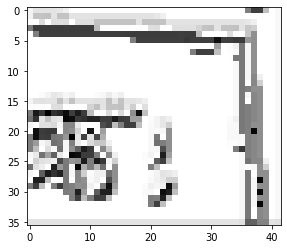

42


True

In [ ]:
l=lbp(photo1)
from matplotlib import pyplot as plt
plt.imshow(l, cmap ="gray") 
plt.show()
print(len(l[1]))
cv2.imwrite('out.png',l)

# Gabor

In [ ]:
# Delete directories in Python using shutil
import shutil
path = '/content/barakhadi_gabor'
shutil.rmtree(path, ignore_errors=True)

In [ ]:
os.mkdir('/content/barakhadi_gabor')

In [ ]:
import cv2
import os
import glob
import numpy as np


img_dir = "images" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []

vyanjan_jpg = ['ka','kha','ga','gha','ang','cha','chha','ja','za','nya','Tta','Ttha','Dda','Ddha','ana','ta','tha','da','dha','na','pa','pha','ba','bha','ma','ya','ra','la','va','sha','ssha','sa','ha','ksha','tra','dnya','blank','x']
swara_jpg = ['a','aa','e','ee','u','uu','ae','ai','ao','au','am','aha']
import fitz 
for i in range(38):
  os.mkdir("/content/barakhadi_gabor/" + vyanjan_jpg[37-i])
  for j in range(12):
      for k in range(len(pdfs)):
          input = "/content/barakhadi_jpg/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(k+1) + ".jpg"
          img = cv2.imread(input,0)
          data.append(img)
          img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  
          ret, labels = cv2.connectedComponents(img)
          label_hue = np.uint8(179*labels/np.max(labels))
          blank_ch = 255*np.ones_like(label_hue)
          labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
          labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
          labeled_img[label_hue==0] = 0
          cv2.imwrite('labeled.png', labeled_img)
          cv2.waitKey()
          

          def build_filters():
              filters = []
              ksize = 31
              for theta in np.arange(0, np.pi, np.pi / 16):
                  kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
                  kern /= 1.5*kern.sum()
                  filters.append(kern)
              return filters

          def process(img, filters):
              accum = np.zeros_like(img)
              for kern in filters:
                  fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
                  np.maximum(accum, fimg, accum)
              return accum

          filters=build_filters()
          res1=process(img,filters)
          cv2.imwrite("/content/barakhadi_gabor/" + vyanjan_jpg[37-i] +"/out_" + vyanjan_jpg[37-i] + "_" + swara_jpg[j] + "_" + str(k+1) + ".jpg",res1)

# CLassification Characters

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['da','dha']
flat_data_arr=[] #input array
target_arr=[] #output array
#datadir='barakhadi_lbp' 
datadir='barakhadi_lbp'
#path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        print(img)
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : da
out_da_u_5.jpg
out_da_aa_3.jpg
out_da_ee_4.jpg
out_da_uu_4.jpg
out_da_ai_5.jpg
out_da_aha_5.jpg
out_da_a_1.jpg
out_da_au_2.jpg
out_da_aha_4.jpg
out_da_ae_4.jpg
out_da_ao_4.jpg
out_da_u_4.jpg
out_da_aha_1.jpg
out_da_aa_5.jpg
out_da_aha_2.jpg
out_da_au_3.jpg
out_da_a_3.jpg
out_da_aa_1.jpg
out_da_ae_1.jpg
out_da_e_3.jpg
out_da_am_2.jpg
out_da_ae_2.jpg
out_da_ao_3.jpg
out_da_e_4.jpg
out_da_am_5.jpg
out_da_ae_3.jpg
out_da_u_2.jpg
out_da_am_4.jpg
out_da_uu_2.jpg
out_da_e_5.jpg
out_da_ao_1.jpg
out_da_aa_4.jpg
out_da_uu_1.jpg
out_da_ao_5.jpg
out_da_ee_1.jpg
out_da_ae_5.jpg
out_da_ai_4.jpg
out_da_au_1.jpg
out_da_e_1.jpg
out_da_ai_3.jpg
out_da_ee_5.jpg
out_da_e_2.jpg
out_da_u_3.jpg
out_da_au_5.jpg
out_da_aa_2.jpg
out_da_ai_1.jpg
out_da_a_2.jpg
out_da_uu_3.jpg
out_da_aha_3.jpg
out_da_ao_2.jpg
out_da_au_4.jpg
out_da_a_4.jpg
out_da_am_3.jpg
out_da_ee_2.jpg
out_da_a_5.jpg
out_da_ee_3.jpg
out_da_am_1.jpg
out_da_u_1.jpg
out_da_ai_2.jpg
out_da_uu_5.jpg
loaded category:da succes

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [ ]:
import pickle
Pkl_Filename = "model_characters.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1]
The actual data is:
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1]
The model is 91.66666666666666% accurate


In [ ]:
from pydantic import BaseModel

class Character(BaseModel):
    img = ''
    class Config:
        schema_extra = {
            "example": {
                "img": "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Devanagari_dh.svg/220px-Devanagari_dh.svg.png"
                #https://2.bp.blogspot.com/-D6xlJELDk-E/XOf0CGkhx8I/AAAAAAAAC8A/BHM5Y-BwY-4MBMXfLMU8_Jxeh2nA1TzNACLcBGAs/w1200-h630-p-k-no-nu/marathi-baby-boy-names-by-initial-d.png
            }
        }

In [ ]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_characters.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_character_category(data: Character):
    Categ = ['da','dha']
    recieved = data.dict()
    img=imread(recieved['img'])
    img_resize=resize(img,(150,150,3))
    l=[img_resize.flatten()]
    pred_name = model.predict(l)[0]
    return {'prediction': Categ[pred_name]}

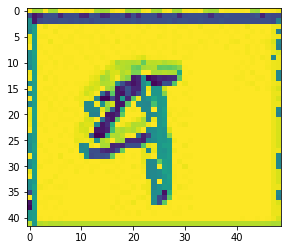

da = 3.3898799573399003%
dha = 96.61012004266009%
The predicted image is : dha


In [ ]:
user_input = 'out_dha_a_1.jpg'
#user_input = input()
img=imread('content/barakhadi_lbp/dha/' + user_input)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [ ]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)

In [ ]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

/drive/ngrok-ssh
--2022-05-06 03:42:49--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 54.237.133.81, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  14.0MB/s    in 0.9s    

2022-05-06 03:42:51 (14.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!/ngrok authtoken 28jhYHZjFz5xtQkkvETjPYcZIbB_qn2pbNYrBq9JcJ89Rm39

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%cd ..

/


# Multiple models

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error

In [ ]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Gausian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Logistic Regression : 0.8333333333333334
Decision Tree Classification : 0.5
Random Forest Classification : 0.75
Gradient Boosting Classification : 0.5416666666666666
Ada Boosting Classification : 0.75
Extra Tree Classification : 0.75
K-Neighbors Classification : 0.8333333333333334
Gausian Naive Bayes : 0.7083333333333334


In [ ]:
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
cla_pred.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))

0.75


# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier 

mlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                    max_iter=480, 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4, 
                    random_state=1,
                    learning_rate_init=.1)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)
print(accuracy_score(y_test,predictions))

0.5


# Stacking Classifiers

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
estimators = [     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),     ('svr', make_pipeline(StandardScaler(),  SVC(random_state=42))) ]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(accuracy_score(y_test,predictions))

0.8333333333333334
